# K Means Clustering Project -2

### For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read data
data = pd.read_csv('College_Data',index_col=0)

In [3]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [5]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


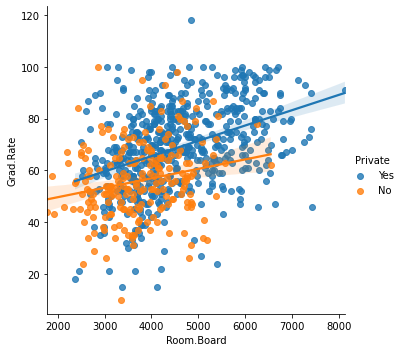

In [11]:
#EDA
sns.lmplot('Room.Board','Grad.Rate',data=data, hue='Private')

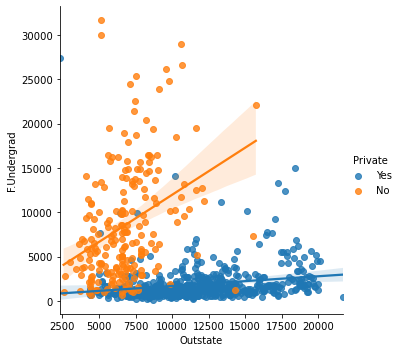

In [12]:
sns.lmplot('Outstate','F.Undergrad',data=data, hue='Private')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


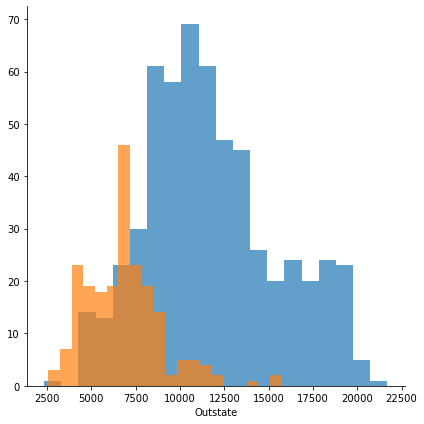

In [14]:
g = sns.FacetGrid(data,hue="Private",size =6)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

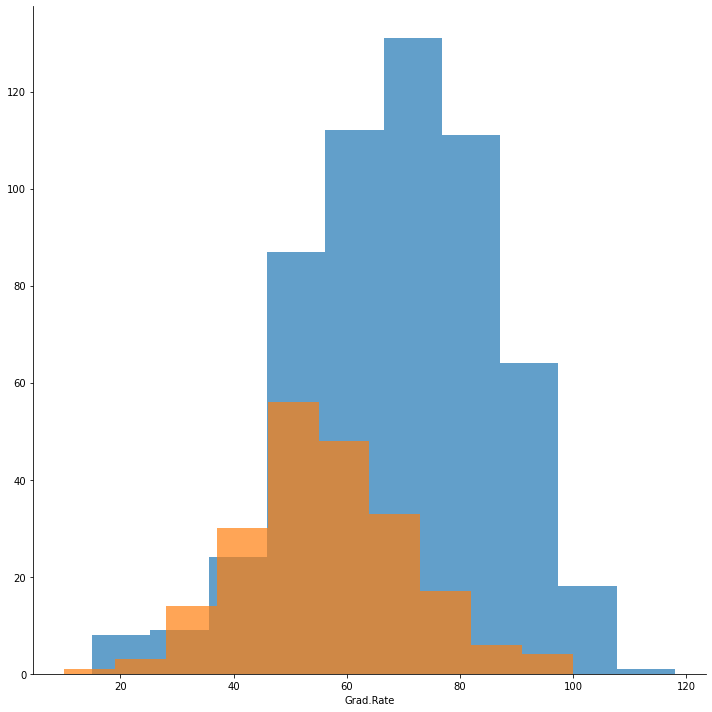

In [19]:
g = sns.FacetGrid(data,hue="Private",size =10)
g = g.map(plt.hist,'Grad.Rate',bins=10,alpha=0.7)

In [20]:
data[data['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [22]:
data['Grad.Rate']['Cazenovia College'] = 100
#scalling

<ipython-input-22-b28b0fe12a75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Grad.Rate']['Cazenovia College'] = 100


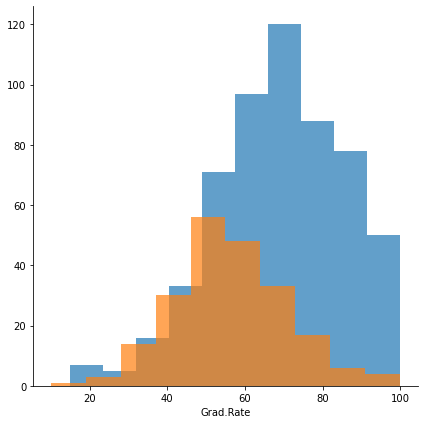

In [30]:
#modelling
from sklearn.cluster import KMeans

In [31]:
kmeans = KMeans()

In [32]:
kmeans.fit(data.drop('Private',axis =1))

KMeans()

In [47]:
 kmeans.cluster_centers_

array([[1.26442969e+03, 9.91214844e+02, 3.48757812e+02, 2.43593750e+01,
        5.25976562e+01, 1.42333594e+03, 4.47894531e+02, 1.13969883e+04,
        4.60308203e+03, 5.38496094e+02, 1.20876953e+03, 6.83476562e+01,
        7.66914062e+01, 1.30902344e+01, 2.54375000e+01, 8.99407813e+03,
        6.88203125e+01],
       [2.60601695e+03, 1.76694068e+03, 5.23949153e+02, 4.10762712e+01,
        7.10677966e+01, 2.05556780e+03, 2.49813559e+02, 1.62156186e+04,
        5.26679661e+03, 5.57042373e+02, 9.88000000e+02, 8.51525424e+01,
        9.18050847e+01, 1.14322034e+01, 3.29830508e+01, 1.38596271e+04,
        7.75338983e+01],
       [9.91432653e+03, 6.80700000e+03, 2.67920408e+03, 3.09591837e+01,
        6.28979592e+01, 1.40197551e+04, 3.06655102e+03, 8.47451020e+03,
        4.25636735e+03, 6.04591837e+02, 1.90095918e+03, 8.43877551e+01,
        8.95918367e+01, 1.57673469e+01, 1.60612245e+01, 9.86716327e+03,
        6.13673469e+01],
       [7.47887500e+03, 2.68937500e+03, 1.03037500e+03, 7.325

In [49]:
kmeans.labels_

array([7, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 7, 7, 4, 0, 0, 5, 3, 5,
       0, 6, 0, 7, 0, 2, 0, 0, 0, 0, 7, 7, 0, 0, 1, 1, 0, 5, 0, 7, 7, 7,
       1, 7, 7, 1, 1, 0, 7, 7, 7, 7, 0, 7, 5, 7, 0, 6, 4, 2, 1, 0, 1, 7,
       7, 0, 0, 6, 4, 1, 1, 0, 0, 0, 7, 0, 2, 5, 0, 7, 7, 0, 0, 7, 1, 4,
       0, 7, 0, 4, 7, 0, 1, 0, 0, 7, 0, 0, 0, 0, 5, 5, 5, 7, 0, 1, 1, 0,
       0, 0, 7, 7, 1, 1, 0, 1, 2, 7, 0, 0, 1, 1, 0, 5, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 7, 0, 1, 5, 1, 1, 2, 7, 0, 4, 0, 7, 0, 7, 1, 0, 1, 4, 7,
       7, 7, 0, 0, 4, 1, 0, 7, 1, 1, 1, 7, 7, 7, 7, 7, 0, 0, 1, 0, 4, 1,
       2, 5, 7, 0, 7, 5, 0, 7, 1, 0, 0, 0, 7, 0, 7, 4, 7, 0, 0, 7, 1, 7,
       0, 7, 0, 5, 7, 2, 7, 1, 7, 7, 7, 0, 0, 7, 0, 1, 0, 7, 7, 0, 5, 1,
       7, 4, 5, 5, 7, 1, 7, 0, 0, 0, 1, 0, 7, 5, 0, 7, 0, 1, 7, 0, 0, 0,
       1, 0, 0, 5, 7, 7, 7, 1, 3, 4, 7, 7, 0, 1, 1, 5, 1, 1, 0, 0, 7, 0,
       7, 7, 0, 7, 1, 2, 0, 0, 7, 5, 6, 7, 0, 2, 1, 2, 5, 7, 7, 0, 3, 7,
       0, 1, 2, 7, 7, 7, 1, 0, 0, 7, 1, 7, 0, 1, 7,

In [50]:
#verifying 

In [51]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [53]:
data['Cluster'] = data['Private'].apply(converter)

In [54]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [55]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data['Cluster'],kmeans.labels_))
print(classification_report(data['Cluster'],kmeans.labels_))

[[  3   1  45   0   0  86  15  62]
 [253 117   4   8  24   9   2 148]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.01      0.01      0.01       212
           1       0.99      0.21      0.34       565
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.15       777
   macro avg       0.13      0.03      0.04       777
weighted avg       0.72      0.15      0.25       777



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
